In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define activation and training functions
# Activation function (linear)
def linear_function(x):
    return x

# Function to make predictions (output)
def adaline_predict(X, weights):
    return linear_function(np.dot(X, weights[1:]) + 0 * weights[0])

# Adaline algorithm
def adaline_train(X, y, learning_rate, epochs):
    # Initialize weights (one more for the bias)
    weights = np.random.rand(X.shape[1] + 1)
    # Error vector
    errors = []

    # Training
    for _ in range(epochs):
        total_error = 0
        for xi, target in zip(X, y):
            # Calculate the output (prediction)
            output = adaline_predict(xi, weights)
            # Calculate absolute error
            error = (target - output) ** 2
            total_error += abs(error)
            # Update the weights
            update = 2 * learning_rate * (target - output)
            weights[1:] += update * xi
            weights[0] += update
        errors.append(total_error)
    return weights, errors

Text(0, 0.5, 'Signal amplitude')

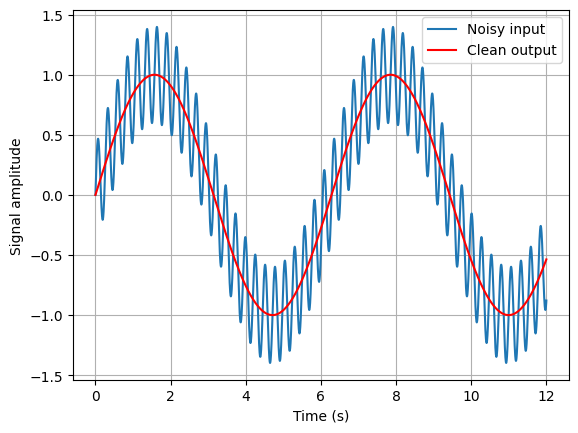

In [3]:
# Prepare input and output data
# Input data for the adaptive filter
# Noisy signal
n_samples = 5000
t = np.linspace(0, 12, n_samples)
noise = 0.4 * np.sin(24 * t)
X = np.sin(t) + noise
plt.plot(t, X)
plt.grid()

# Expected output: clean signal (no noise)
y = np.sin(t)
plt.plot(t, y, 'r')
plt.legend(["Noisy input", "Clean output"])
plt.xlabel("Time (s)")
plt.ylabel("Signal amplitude")

In [4]:
# Create inputs and output for ADALINE
delay = 15
noisy_signal = np.array([X[i:i + delay] for i in range(n_samples - delay)])
print(noisy_signal.shape)
d = y[delay:]

(4985, 15)


In [5]:
# Train the adaline
weights, errors = adaline_train(noisy_signal, d, 0.01, 200)
print("Trained weights:", weights)
print("Errors:", errors)

Trained weights: [-0.5858197   4.29423168  2.57159577  1.2611706  -0.75186979 -1.072757
 -2.29454119 -2.04842874 -2.72132433 -2.26898759 -2.02539233 -1.58861051
 -0.25851546  0.77542121  2.56913819  4.5408271 ]
Errors: [227.24561177298258, 123.60422574378971, 115.61547316169157, 108.65082023526456, 102.1383475825892, 96.02073509522646, 90.27233405539204, 84.87071552389722, 79.79490680481918, 75.02521048596502, 70.54312171667289, 66.33125565860487, 62.37327963690884, 58.653849419753776, 55.15854935910896, 51.873836157811304, 48.78698604314612, 45.886045140542635, 43.159782853486625, 40.597648067517504, 38.18972800719565, 35.926709585306156, 33.79984309330111, 31.80090809113321, 29.922181363222677, 28.156406815383665, 26.496767195115428, 24.936857524784532, 23.470660143930175, 22.09252126319982, 20.797128938337217, 19.57949237819302, 18.43492250593404, 17.3590136975373, 16.347626626241183, 15.396872145956879, 14.503096150698344, 13.662865350904221, 12.87295391110749, 12.130330896773833, 

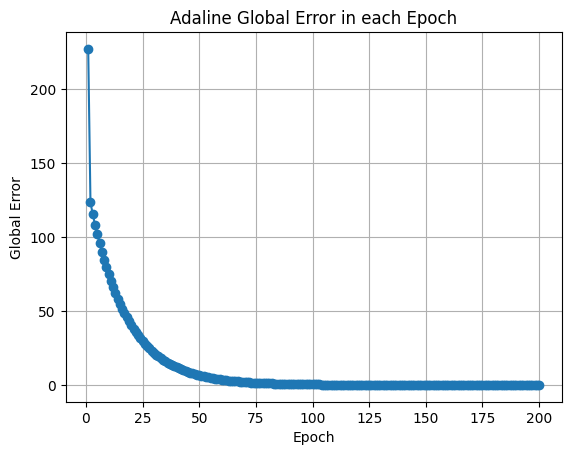

In [6]:
# Plot the global error in each epoch
plt.figure()
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Global Error')
plt.title('Adaline Global Error in each Epoch')
plt.grid(True)

size  (4985,)
sizes y  (4985,)


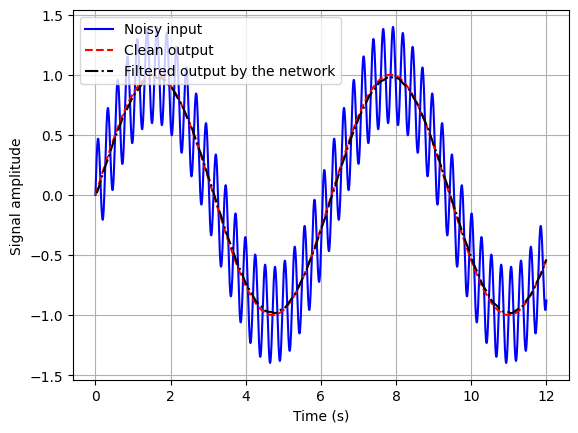

In [7]:
# Filtered signal
prediction = np.zeros(noisy_signal.shape[0])
print("size ", prediction.shape)
i = 0
for xi in noisy_signal:
    prediction[i] = adaline_predict(xi, weights)
    i += 1

print("sizes y ", prediction.shape)
# Display the plot
plt.figure()
plt.grid(True)
plt.plot(t, X, 'b')
plt.plot(t, y, '--r')
plt.plot(t[delay:], prediction, '-.k')
plt.legend(["Noisy input", "Clean output", 'Filtered output by the network'])
plt.xlabel("Time (s)")
plt.ylabel("Signal amplitude")
plt.show()
